In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as py
%matplotlib inline

In [2]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = (10, 6)

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
crops = ['Coconut', 'Groundnut', 'Maize', 'Onion', 'Paddy', 'Potato', 'Ragi', 'Rice', 'Tomato',
         'Wheat']

In [5]:
print("Choose a crop")
i = 1
for crop in crops:
    print("%d => %s" %(i,crop))
    i = i+1

idx = 0
while(idx == 0):
    try:
        idx = int(input("Enter the crop number : "))
    except:
        idx = 0
        print('Enter a number')
print("You have selected : ", crops[idx-1])

Choose a crop
1 => Coconut
2 => Groundnut
3 => Maize
4 => Onion
5 => Paddy
6 => Potato
7 => Ragi
8 => Rice
9 => Tomato
10 => Wheat
Enter the crop number : 9
You have selected :  Tomato


In [6]:
fName = "F://Mohan/6th Sem/Mini Project/Mini Project/WeekDataPy/"+crops[idx-1]+".csv"
data = pd.read_csv(fName, parse_dates = ['Date'], index_col = ['Date'])

In [7]:
data.head()

,Bagepalli,Bangarpet,"Binny Mill (F&V), Bangalore",Channapatana,Chickkaballapura,Chikkamagalore,Chintamani,Davangere,Doddaballa Pur,Gundlupet,...,K.R.Nagar,Kanakapura,Kolar,Malur,Mulabagilu,Mysore (Bandipalya),Nagamangala,Ramanagara,Shimoga,Srinivasapur
Date,,,,,,,,,,,,,,,,,,,,,
2002-01-07,300.0,250.0,300.0,438.0,133.0,189.0,300.0,212.0,633.0,150.0,...,250.0,733.0,225.0,180.0,755.0,478.0,200.0,200.0,300.0,250.0
2002-01-14,300.0,250.0,300.0,438.0,133.0,189.0,300.0,167.0,633.0,150.0,...,250.0,733.0,225.0,180.0,755.0,478.0,200.0,200.0,300.0,250.0
2002-01-21,300.0,250.0,467.0,438.0,133.0,189.0,300.0,190.0,633.0,150.0,...,250.0,733.0,225.0,180.0,755.0,522.0,200.0,200.0,300.0,250.0
2002-01-28,300.0,250.0,448.0,438.0,133.0,189.0,300.0,200.0,633.0,150.0,...,250.0,733.0,225.0,180.0,755.0,352.0,200.0,200.0,300.0,250.0
2002-02-04,300.0,250.0,430.0,438.0,133.0,189.0,300.0,190.0,633.0,150.0,...,250.0,733.0,225.0,180.0,755.0,495.0,200.0,200.0,300.0,250.0


In [8]:
markets = list(data.columns)

In [9]:
print(markets)

['Bagepalli', 'Bangarpet', 'Binny Mill (F&V), Bangalore', 'Channapatana', 'Chickkaballapura', 'Chikkamagalore', 'Chintamani', 'Davangere', 'Doddaballa Pur', 'Gundlupet', 'Hassan', 'Honnali', 'Hospet', 'K.R.Nagar', 'Kanakapura', 'Kolar', 'Malur', 'Mulabagilu', 'Mysore (Bandipalya)', 'Nagamangala', 'Ramanagara', 'Shimoga', 'Srinivasapur']


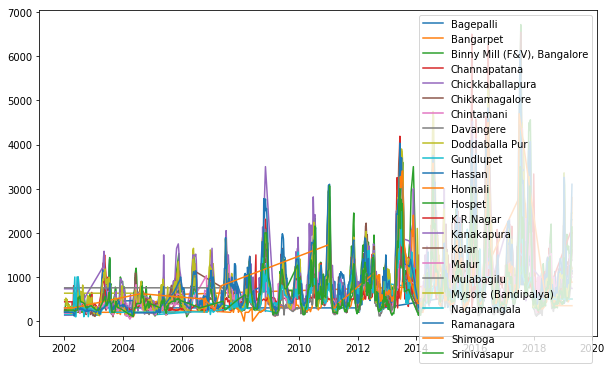

In [10]:
py.plot(data, label = 'Data')
py.legend(markets)
py.show()

In [11]:
print('Select a market :')
i = 1
for market in markets:
    print("%d => %s" %(i, market))
    i = i+1
    
idx = 0
while(idx == 0):
    try:
        idx = int(input("Enter the Market number : "))
    except:
        idx = 0
        print("Enter a number")
        
print("You have selected : ", markets[idx-1])

Select a market :
1 => Bagepalli
2 => Bangarpet
3 => Binny Mill (F&V), Bangalore
4 => Channapatana
5 => Chickkaballapura
6 => Chikkamagalore
7 => Chintamani
8 => Davangere
9 => Doddaballa Pur
10 => Gundlupet
11 => Hassan
12 => Honnali
13 => Hospet
14 => K.R.Nagar
15 => Kanakapura
16 => Kolar
17 => Malur
18 => Mulabagilu
19 => Mysore (Bandipalya)
20 => Nagamangala
21 => Ramanagara
22 => Shimoga
23 => Srinivasapur
Enter the Market number : 11
You have selected :  Hassan


In [12]:
market = markets[idx-1]
selData = data[[market]]
selData.rename(columns = {market :'Price'}, inplace = True)
selData.head()

,Price
Date,
2002-01-07,250.0
2002-01-14,250.0
2002-01-21,250.0
2002-01-28,250.0
2002-02-04,250.0


In [16]:
selData.shape

(903, 1)

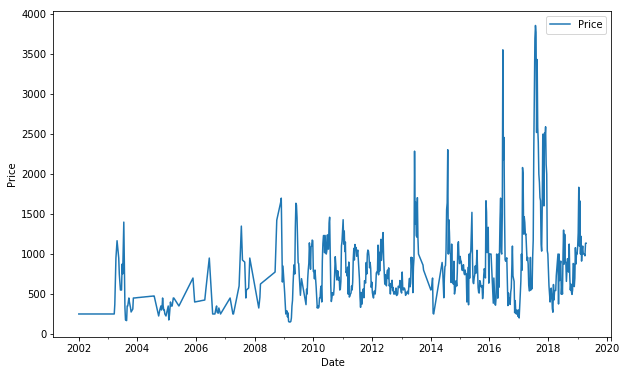

In [13]:
selData.plot()
py.ylabel('Price')
py.show()

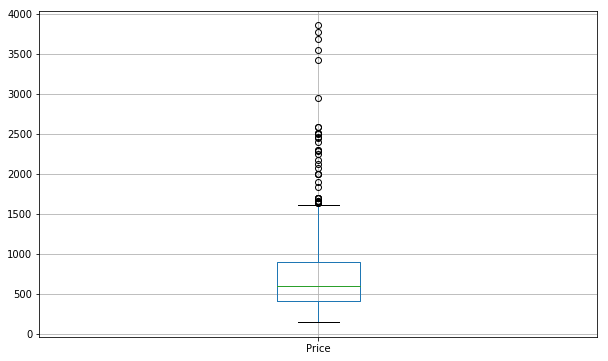

In [14]:
selData.boxplot()
py.show()

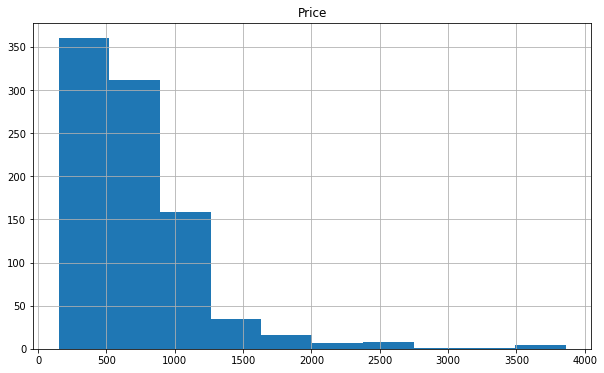

In [15]:
selData.hist()
py.show()

In [50]:
def removeOutliers(timeSeries):
    Q1 = timeSeries.quantile(0.25)
    Q3 = timeSeries.quantile(0.75)
    IQR = Q3 - Q1
    lowRep = timeSeries.quantile(0.05)
    highRep = timeSeries.quantile(0.95)
    outliers = 1.5 * IQR
    outCount = timeSeries[timeSeries < (Q1 - outliers)].count()
    outCount = outCount + timeSeries[timeSeries > (Q3 + outliers)].count()
    timeSeries[timeSeries < (Q1 - outliers)] = lowRep
    timeSeries[timeSeries > (Q3 + outliers)] = highRep
    #print(type(lowRep))
    print("No. of Outliers replaced = %d" %(outCount))

In [51]:
removeOutliers(selData.Price)

No. of Outliers replaced = 37


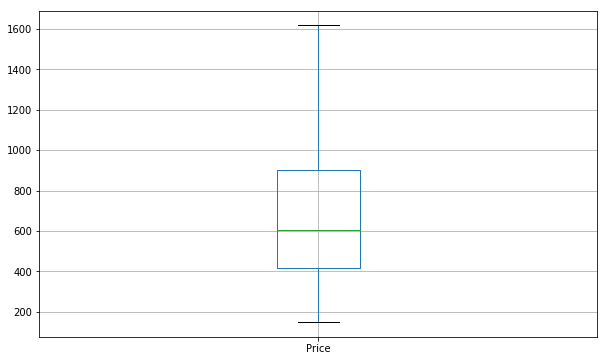

In [52]:
selData.boxplot()
py.show()

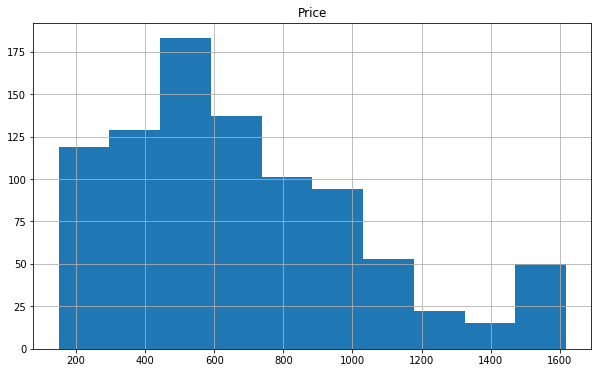

In [53]:
selData.hist()
py.show()

In [55]:
def stationaryPlot(timeSeries):
    movingAverage = timeSeries.rolling(52).mean()
    movingStd = timeSeries.rolling(52).std()
    py.plot(timeSeries, color='royalblue', label = 'Original')
    py.plot(movingAverage, color = 'red', label = 'RollingMean')
    py.plot(movingStd, color = 'lightgreen', label = 'RollingStd')
    py.legend(loc='best')
    py.show()

In [56]:
from statsmodels.tsa.stattools import adfuller
def adftest(timeSeries):
    adfresult = adfuller(timeSeries, autolag = "AIC")
    adfSummary = pd.Series(adfresult[0:4], index = ['TestStatistics', 'pValue', 'LagUsed', 
                                                    'Observations'])
    for key, val in adfresult[4].items():
        adfSummary['CriticalValue(%s)'%key] = val
    print('ADF Test Summary:')
    print(adfSummary)

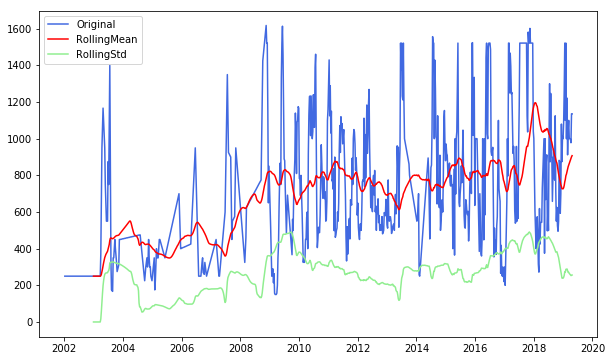

In [57]:
stationaryPlot(selData)

In [58]:
adftest(selData.Price)

ADF Test Summary:
TestStatistics         -4.421476
pValue                  0.000272
LagUsed                15.000000
Observations          887.000000
CriticalValue(1%)      -3.437744
CriticalValue(5%)      -2.864804
CriticalValue(10%)     -2.568508
dtype: float64


In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose
def decompose(timeSeries):
    decomp = seasonal_decompose(timeSeries)
    trend = decomp.trend
    seasonal = decomp.seasonal
    residual = decomp.resid
    
    py.subplot(411)
    py.plot(timeSeries, label = 'Original')
    py.legend(loc = 'best')
    
    py.subplot(412)
    py.plot(trend, label = 'Trend')
    py.legend(loc = 'best')
    
    py.subplot(413)
    py.plot(seasonal, label = 'Seasonal')
    py.legend(loc = 'best')
    
    py.subplot(414)
    py.plot(residual, label = 'Residual')
    py.legend(loc = 'best')
    py.show()

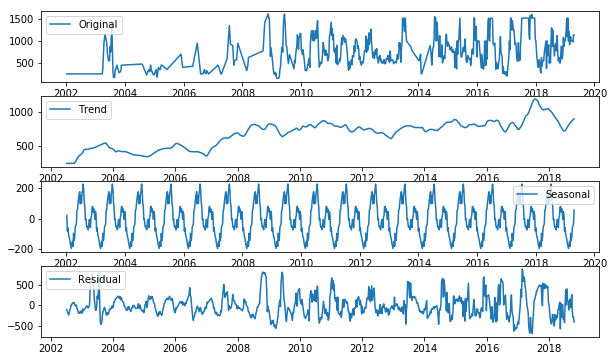

In [60]:
decompose(selData)

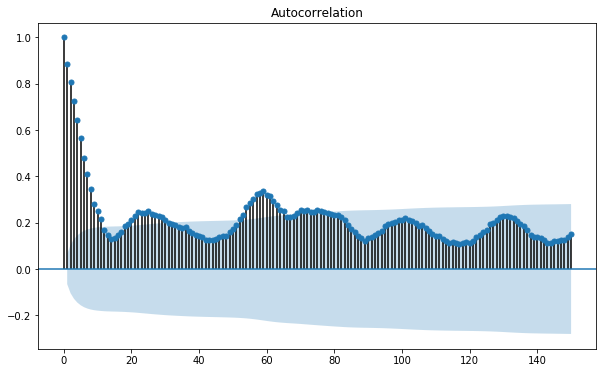

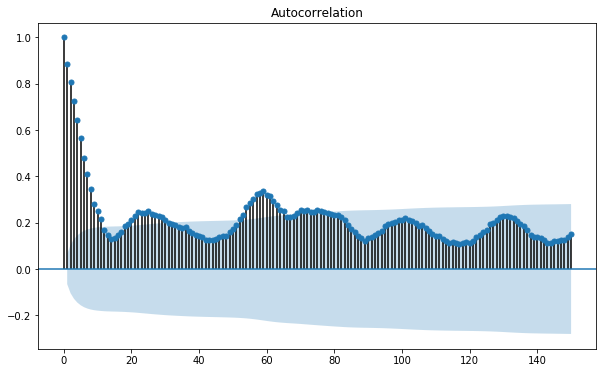

In [61]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(selData, lags=150)

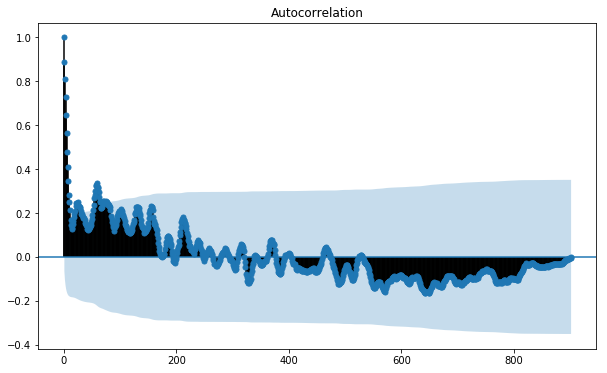

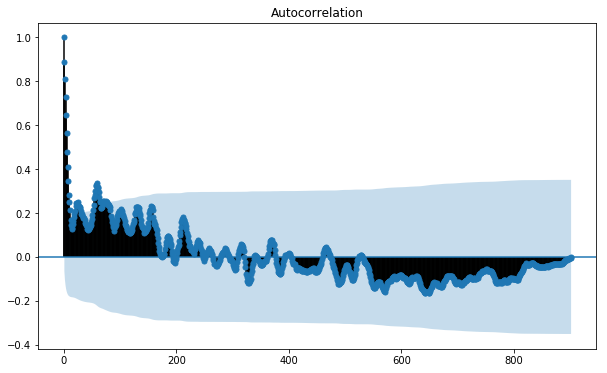

In [62]:
plot_acf(selData)

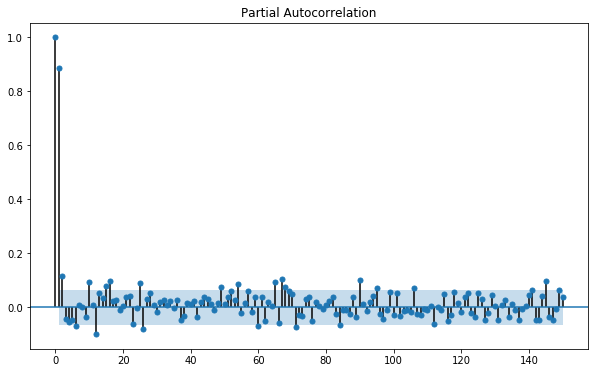

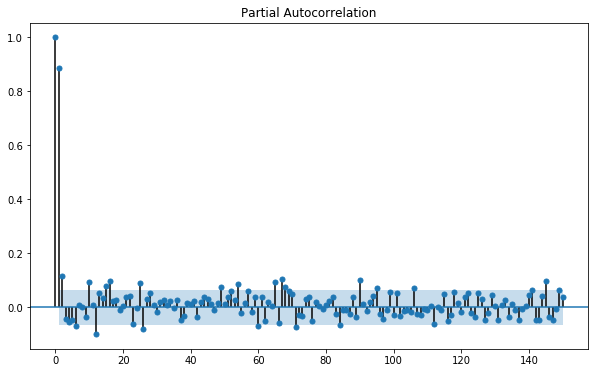

In [63]:
plot_pacf(selData, lags=150)

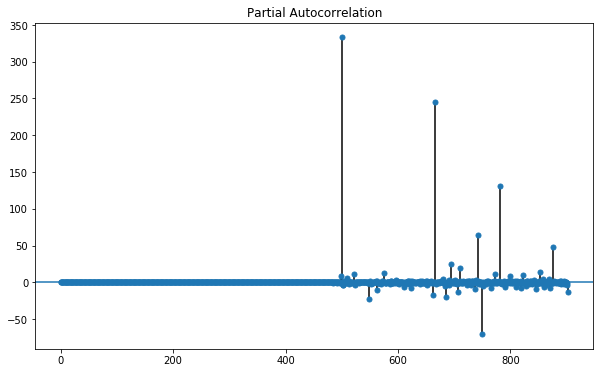

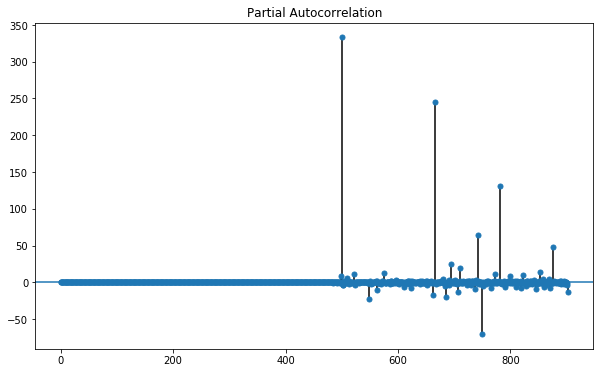

In [64]:
plot_pacf(selData)

In [65]:
diffData = selData - selData.shift()
diffData.dropna(inplace = True)

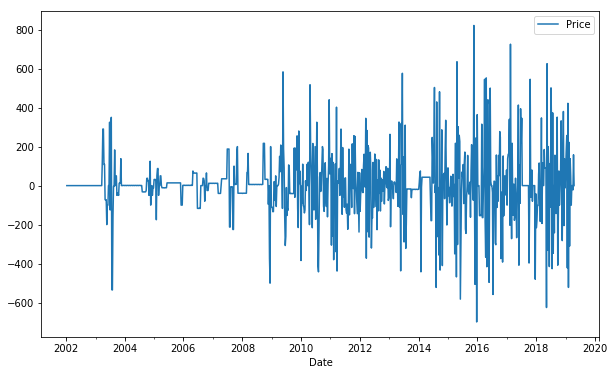

In [66]:
diffData.plot()
py.show()

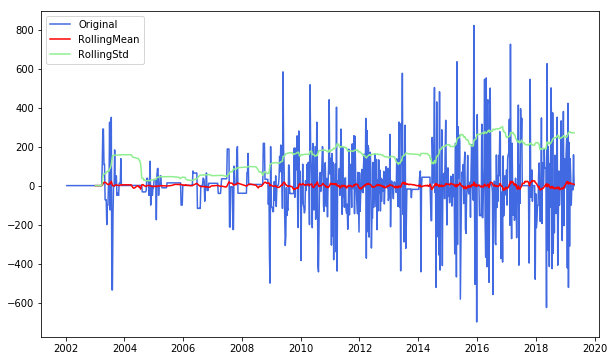

In [67]:
stationaryPlot(diffData)

In [68]:
adftest(diffData.Price)

ADF Test Summary:
TestStatistics       -1.146117e+01
pValue                5.549959e-21
LagUsed               1.600000e+01
Observations          8.850000e+02
CriticalValue(1%)    -3.437761e+00
CriticalValue(5%)    -2.864811e+00
CriticalValue(10%)   -2.568512e+00
dtype: float64


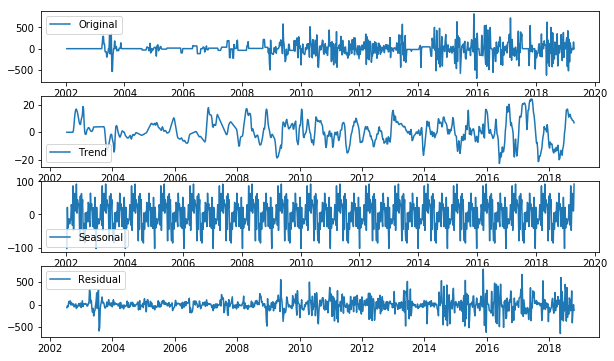

In [69]:
decompose(diffData)

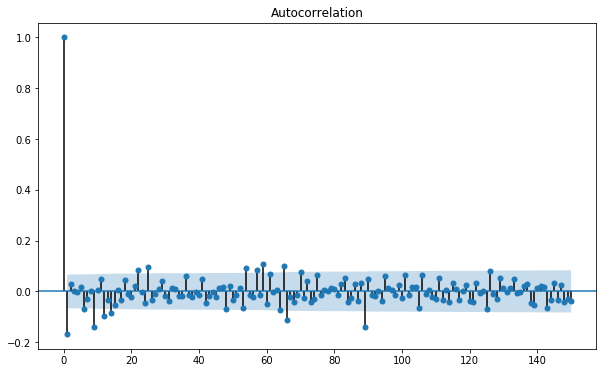

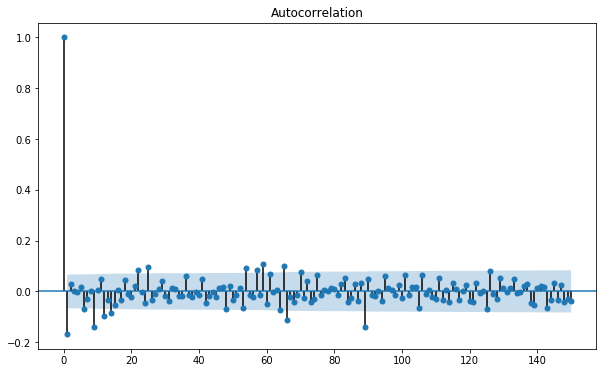

In [70]:
plot_acf(diffData, lags=150)

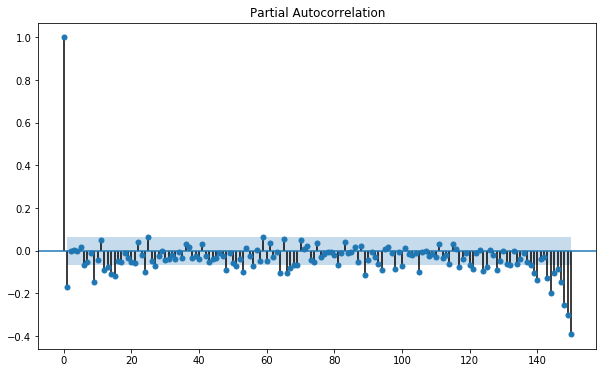

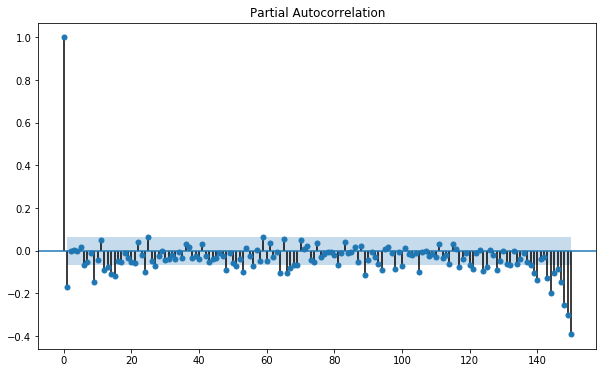

In [71]:
plot_pacf(diffData, lags=150)

In [72]:
dValue = 1

In [73]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [74]:
aic = dict()
def SARIMA(timeSeries):
    i = 0
    j = 0

    for i in range(0,4):
        for j in range(0,4):
            model = SARIMAX(selData, order=(i,1,j), seasonal_order=(1,1,1,52), 
                            enforce_stationarity=False, enforce_invertibility=False)
            results = model.fit()
            aic[str(i)+str(j)] = results.aic

In [75]:
SARIMA(selData)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarn

In [76]:
aic

{'00': 10550.263264567813,
 '01': 10511.295793212212,
 '02': 10500.893760323077,
 '03': 10490.601828901446,
 '10': 10523.640667794582,
 '11': 10480.762445505956,
 '12': 10502.767138390987,
 '13': 10447.185194473783,
 '20': 10513.02909276422,
 '21': 10472.038970999067,
 '22': 10460.624207201381,
 '23': 10545.89768431049,
 '30': 10502.720306280567,
 '31': 10504.890190390379,
 '32': 10604.947985789047,
 '33': 10572.33558186029}

In [77]:
minValue = np.inf
minKey = None
for key, val in aic.items():
    if(val < minValue):
        minValue=val
        minKey = key
        
print(minKey)
print(minValue)

13
10447.185194473783


In [78]:
pValue, qValue = list(minKey)

In [79]:
type(pValue)

str

In [80]:
pValue = int(pValue)

In [81]:
qValue = int(qValue)

In [82]:
print(pValue)
print(qValue)

1
3


In [83]:
type(pValue)

int

In [84]:
%%time

model = SARIMAX(selData, order = (pValue,dValue,qValue), seasonal_order=(1,1,1,52),
               enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)


Wall time: 2min 38s


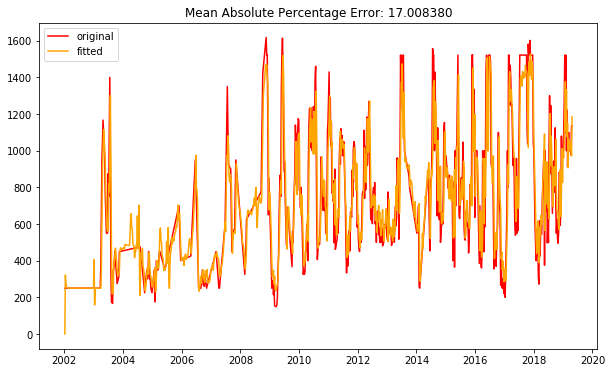

In [85]:
py.plot(selData, color="red", label="original")
py.plot(results.fittedvalues,color="orange",label="fitted")
py.legend(loc="best")
py.title('Mean Absolute Percentage Error: %f'
         %(np.mean(abs(results.fittedvalues-selData.Price)/selData.Price*100)))
py.show()

In [86]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Price   No. Observations:                  903
Model:             SARIMAX(1, 1, 3)x(1, 1, 1, 52)   Log Likelihood               -5216.593
Date:                            Fri, 24 May 2019   AIC                          10447.185
Time:                                    17:52:21   BIC                          10479.925
Sample:                                01-07-2002   HQIC                         10459.767
                                     - 04-22-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8545      0.025     34.560      0.000       0.806       0.903
ma.L1         -1.1152      5.923     -0.188      0.851     -12.724      10.494
ma.L2          0.1885      0.684      0.276      0.783      -1.151       1.528
ma.L3         -0.0732      0.428     -0.171      0.864      -0.913       0.766
ar.S.L52      -0.0297      0.037     -0.811      0.417      -0.102       0.042
ma.S.L52      -0.9478      0.064    -14.921      0.000      -1.072      -0.823
sigma2      2.686e+04   1.59e+05      0.169      0.866   -2.85e+05    3.39e+05
===================================================================================
Ljung-Box (Q):                       67.01   Jarque-Bera (JB):               242.69
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               6.56   Skew:                             0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [87]:
print(results.resid.describe())

count    903.000000
mean      -4.773803
std      163.211333
min     -716.476028
25%      -79.353107
50%       -4.732034
75%       55.464329
max      822.328835
dtype: float64


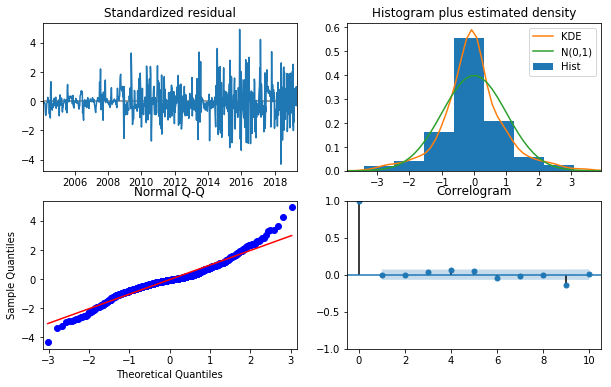

In [88]:
results.plot_diagnostics()
py.show()

In [89]:
forecast = results.forecast(steps=150)

In [90]:
forecast.head()

2019-04-29    1137.329257
2019-05-06    1166.181814
2019-05-13    1199.462179
2019-05-20    1210.652723
2019-05-27    1221.139841
Freq: W-MON, dtype: float64

In [106]:
prediction = results.get_prediction(start = (selData.shape[0] - 200),
                                    end = (selData.shape[0]+ 200), dynamic = False)
pred = prediction.conf_int()
pred.head()

,lower Price,upper Price
2015-06-29,376.077997,1030.636069
2015-07-06,435.798438,1090.352150
2015-07-13,456.541987,1111.091457
2015-07-20,517.256875,1171.802218
2015-07-27,408.689273,1063.230605


In [107]:
predMean =  prediction.predicted_mean
predMean.head()

2015-06-29    703.357033
2015-07-06    763.075294
2015-07-13    783.816722
2015-07-20    844.529546
2015-07-27    735.959939
Freq: W-MON, dtype: float64

In [109]:
selData[(selData.shape[0] - 200):].head()

,Price
Date,
2015-06-29,700.0
2015-07-06,744.0
2015-07-13,852.0
2015-07-20,760.0
2015-07-27,875.0


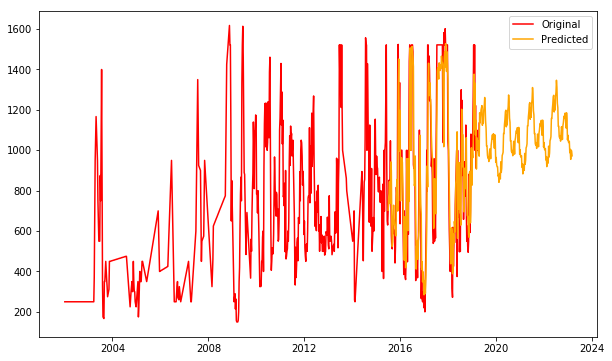

In [110]:
py.plot(selData, label = "Original", color = "Red")
py.plot(predMean, label = "Predicted", color = "orange")
py.legend(loc = "best")
py.show()

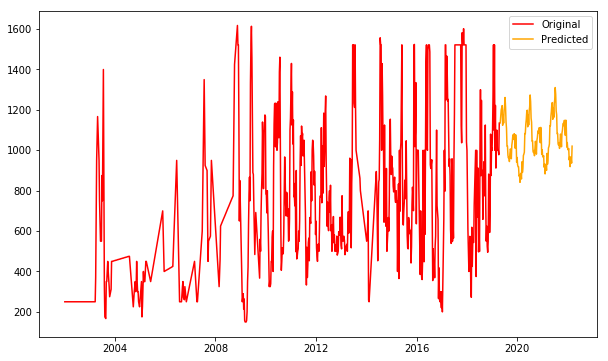

In [111]:
py.plot(selData, label = "Original", color = "Red")
py.plot(forecast, label = "Predicted", color = "orange")
py.legend(loc = "best")
py.show()

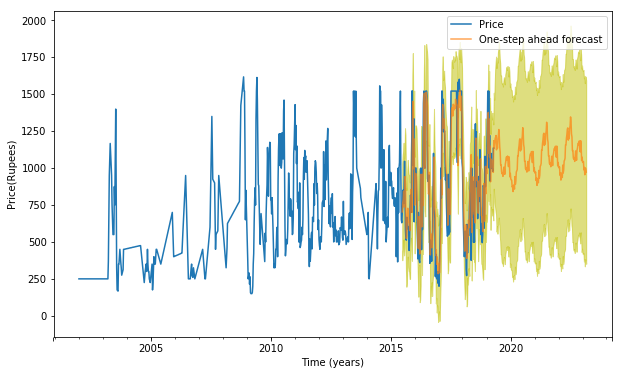

In [112]:
ax = selData.plot(label='observed')
predMean.plot(ax=ax, label='One-step ahead forecast', alpha=.7)

ax.fill_between(pred.index,
                pred.iloc[:, 0],
                pred.iloc[:, 1], color='y', alpha=.5)

ax.set_xlabel('Time (years)')
ax.set_ylabel('Price(Rupees)')
py.legend()

py.show()